<h1 align="center">Volume 4: Shooting Method.</h1>

Spencer Halverson

    2022-02-03

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [2]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0    # Just be careful that t0 != t1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)    # This is the update function
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol


# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may
have several. You may have to determine which solution is physically interesting. The following
bvp has at least two solutions. Using the secant method, find and plot both numerical solutions and
their initial slopes. What initial values t0, t1 did you use
to find them?

Initial slope: 1.0744298031925401
Initial slope: -2.0847037408464013
Initial slope: -4.951965440295842
Initial slope: -3.3435147492184876


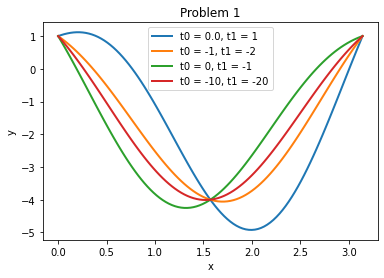

In [21]:
# write ODE
def ode(y,x):
    # solves y" = -4y - 9sin(x)
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

# set constants and initial values


a=0
b=np.pi
alpha=1
beta=1

X = np.linspace(a, b, 100)

# try different initial guesses for t0 and t1
t0 = (beta-alpha)/(b-a)
t1 = 1
Y1 = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta, t0=t0,t1=t1,maxI=40)
plt.plot(X,Y1,linewidth=2, label="t0 = {}, t1 = {}".format(t0, t1))
print("Initial slope:",find_t(ode,a,b,alpha,beta,t0,t1,maxI=40))

t0=-1
t1=-2
Y2 = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta, t0=t0,t1=t1,maxI=40)
plt.plot(X,Y2, linewidth=2, label="t0 = {}, t1 = {}".format(t0, t1))
print("Initial slope:",find_t(ode,a,b,alpha,beta,t0,t1,maxI=40))

t0=0
t1=-1
Y2 = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta, t0=t0,t1=t1,maxI=40)
plt.plot(X,Y2, linewidth=2, label="t0 = {}, t1 = {}".format(t0, t1))
print("Initial slope:",find_t(ode,a,b,alpha,beta,t0,t1,maxI=40))

t0=-10
t1=-20
Y2 = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta, t0=t0,t1=t1,maxI=40)
plt.plot(X,Y2, linewidth=2, label="t0 = {}, t1 = {}".format(t0, t1))
print("Initial slope:",find_t(ode,a,b,alpha,beta,t0,t1,maxI=40))

# plot axes and title
plt.xlabel("x")
plt.ylabel('y')
plt.title("Problem 1")
plt.legend(loc='best')
plt.show()

# Problem 2

Use Newton's method to solve the BVP
y
00 = 3 +
2y
x
2
, x ∈ [1, e],
y(1) = 6,
y(e) = e
2 + 6/e.
Plot your solution.

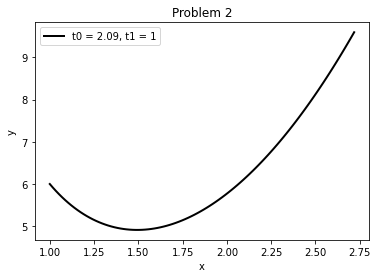

In [23]:
# write ODE
def ode(y,x):
    # solves y" = 3+ 2y/(x**2)
    return np.array([y[1], 3+2*y[0]/(x**2)])

# set constants and initial values


a=1
b=np.exp(1)
alpha=6
beta=np.exp(2) + 6/np.exp(1)
t0 = (beta-alpha)/(b-a)
t1 = 1

# solve
X = np.linspace(a, b, 100)
Y1 = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta, t0=t0,t1=t1,maxI=40)
# plot solution
plt.plot(X,Y1,'-k', linewidth=2, label="t0 = {}, t1 = {}".format(np.round(t0,2), t1))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.title("Problem 2")
plt.show()

I simply used the initial guess (beta-alpha)/(b-a).

# Problem 3

Suppose a projectile is fired from a cannon with velocity 45 m/s2
. At what angle
θ(0) should it be fired to land at a distance of 195 m?
There should be two initial angles θ(0) that produce a solution for this bvp. Use the
secant method to numerically compute and then plot both trajectories.
dy
dx = tan θ,
dv
dx = −
g sin θ + µv2
v cos θ
,
dθ
dx = −
g
v
2
,
y(0) = y(195) = 0,
v(0) = 45 m/s2
(20.8)
(g = 9.8067 m/s2
.) Find and plot both solutions for this boundary value problem when µ = .0003.
Compare with the solutions when µ = 0.

In [58]:
def find_theta(f,a,b,alpha,beta,v0,theta0,theta1,maxI):
    sol1 = beta+1    # Just be careful that theta0 != theta1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,v0, theta0]), [a,b],atol=1e-10)[1,0] 
        sol1 = odeint(f,np.array([alpha,v0, theta1]), [a,b],atol=1e-10)[1,0]
        theta2 = theta1 - (sol1 - beta)*(theta1-theta0)/(sol1-sol0)    # This is the update function
        theta0 = theta1
        theta1 = theta2
        i = i+1
    if i == maxI:
        print("theta not found")
    return theta2

def solveSecant(f,X,a,b,alpha,beta,v0,theta0,theta1,maxI):
    '''
    First find the starting theta that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    theta = find_theta(f,a,b,alpha,beta,v0,theta0,theta1,maxI)
    sol = odeint(f,np.array([alpha,v0,theta]), X,atol=1e-10)[:,0]
    return sol, theta

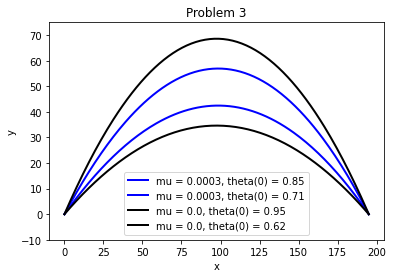

In [77]:
# write ODE
def ode(y,x):
    mu = 0.0003
    g = 9.8067
    # where y = [y, v, theta]
    # return y' = [tan(theta), -(g*sin(theta) + mu*v**2)/(v*cos(theta)), -g/(v**2)]
    return np.array([np.tan(y[2]), 
                     -(g*np.sin(y[2]) + mu*y[1]**2)/(y[1]*np.cos(y[2])),
                     -g/(y[1]**2)])
    
# set constants and initial values


a=0
b=195
alpha=0
beta=0
v0 = 45.
X = np.linspace(a, b, 200)



# solve with air resistance
theta0 = np.pi/3
theta1 = np.pi/4
Y1, theta = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta,v0=v0, theta0=theta0,theta1=theta1,maxI=40)
# plot solution
plt.plot(X,Y1, 'b', linewidth=2, label="mu = 0.0003, theta(0) = {}".format(np.round(theta,2)))
    
# solve
theta0 = np.pi/6
theta1 = np.pi/7
Y2, theta = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta,v0=v0, theta0=theta0,theta1=theta1,maxI=40)

# plot solution
plt.plot(X,Y2, 'b', linewidth=2, label="mu = 0.0003, theta(0) = {}".format(np.round(theta,2)))


## no air resistance
def ode(y,x):
    mu = 0. # no air resistance
    g = 9.8067
    # where y = [y, v, theta]
    # return y' = [tan(theta), -(g*sin(theta) + mu*v**2)/(v*cos(theta)), -g/(v**2)]
    return np.array([np.tan(y[2]), 
                     -(g*np.sin(y[2]) + mu*y[1]**2)/(y[1]*np.cos(y[2])),
                     -g/(y[1]**2)])

# solve
theta0 = np.pi/3
theta1 = np.pi/4
Y1, theta = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta,v0=v0, theta0=theta0,theta1=theta1,maxI=40)
# plot solution
plt.plot(X,Y1, 'k', linewidth=2, label="mu = 0.0, theta(0) = {}".format(np.round(theta,2)))
    
# solve
theta0 = np.pi/6
theta1 = np.pi/7
Y2, theta = solveSecant(ode,X,a=a,b=b,alpha=alpha,beta=beta,v0=v0, theta0=theta0,theta1=theta1,maxI=40)

# plot solution
plt.plot(X,Y2, 'k', linewidth=2, label="mu = 0.0, theta(0) = {}".format(np.round(theta,2)))


plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.title("Problem 3")
plt.ylim(-10, 75)
plt.show()